![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [51]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


## Preprocessing the Data

Consdiering that the data is already clean (no null values), we can move directly into preprocessing. We scale all numeric properties and we encode the only categorical values with a Label Encoder.

In [52]:
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
labelEncoder = LabelEncoder()

df = penguins_df.copy()

df["culmen_length_mm"] = scaler.fit_transform(penguins_df[["culmen_length_mm"]])
df["culmen_depth_mm"] = scaler.fit_transform(penguins_df[["culmen_depth_mm"]])
df["flipper_length_mm"] = scaler.fit_transform(penguins_df[["flipper_length_mm"]])
df["body_mass_g"] = scaler.fit_transform(penguins_df[["body_mass_g"]])
df["sex"] = labelEncoder.fit_transform(penguins_df[["sex"]])

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,1
1,-0.830434,0.126187,-1.068577,-0.504847,0
2,-0.683490,0.432728,-0.426399,-1.187953,0
3,-1.344738,1.096901,-0.569105,-0.939551,0
4,-0.867170,1.761074,-0.783164,-0.691149,1


Now that the data is scaled, we can use a pair plot to see if there is a particular behavior noticeable.

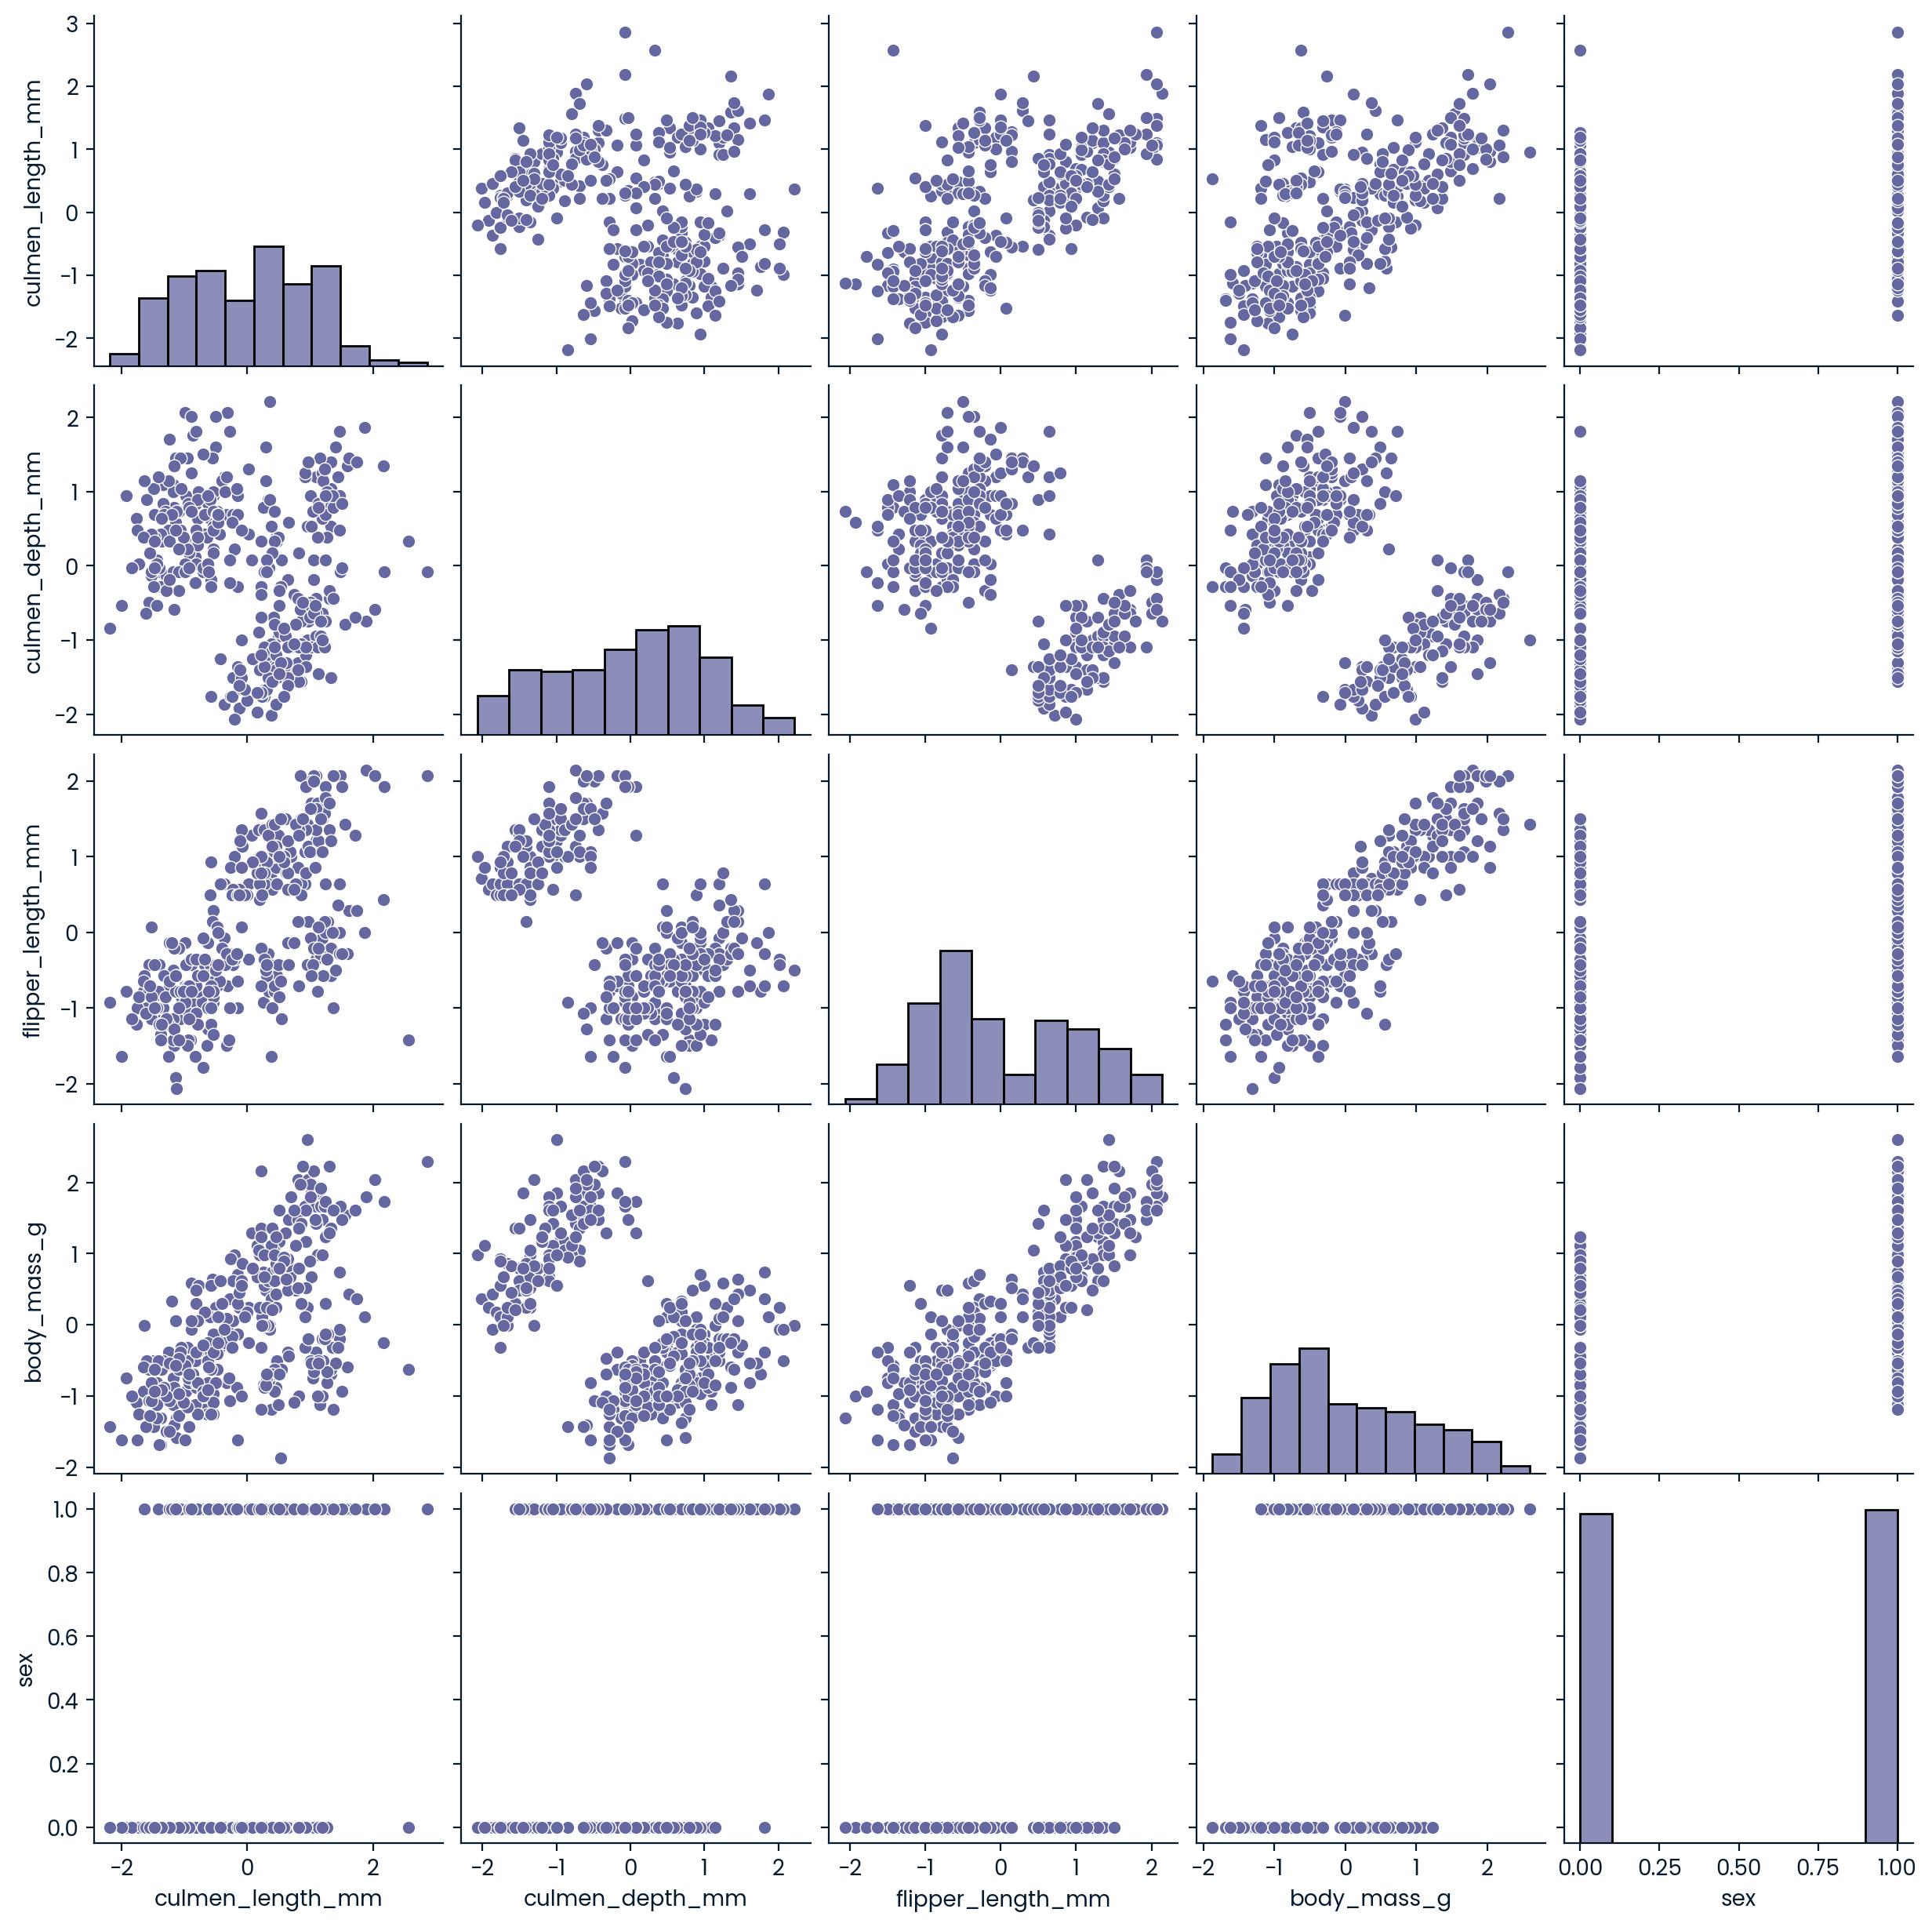

In [53]:
import seaborn as sns

sns.pairplot(df)

As we can see, the presence of at least two clusters can be easily inferred. We know that we are dealing with three species, so it makes sense for there to be three groups. In the plot comparing "culmen_length_mm" vs "flipper_length_mm", for example, we can kind of notice three different groups.

## Model

Now, we pass our processed data into a KMeans model to see if it can actually find three separate clusters that make sense in our data.

In [54]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit_transform(df)
df["cluster"] = kmeans.labels_

df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,-0.903906,0.790360,-1.425342,-0.566948,1,2
1,-0.830434,0.126187,-1.068577,-0.504847,0,2
2,-0.683490,0.432728,-0.426399,-1.187953,0,2
3,-1.344738,1.096901,-0.569105,-0.939551,0,2
4,-0.867170,1.761074,-0.783164,-0.691149,1,2


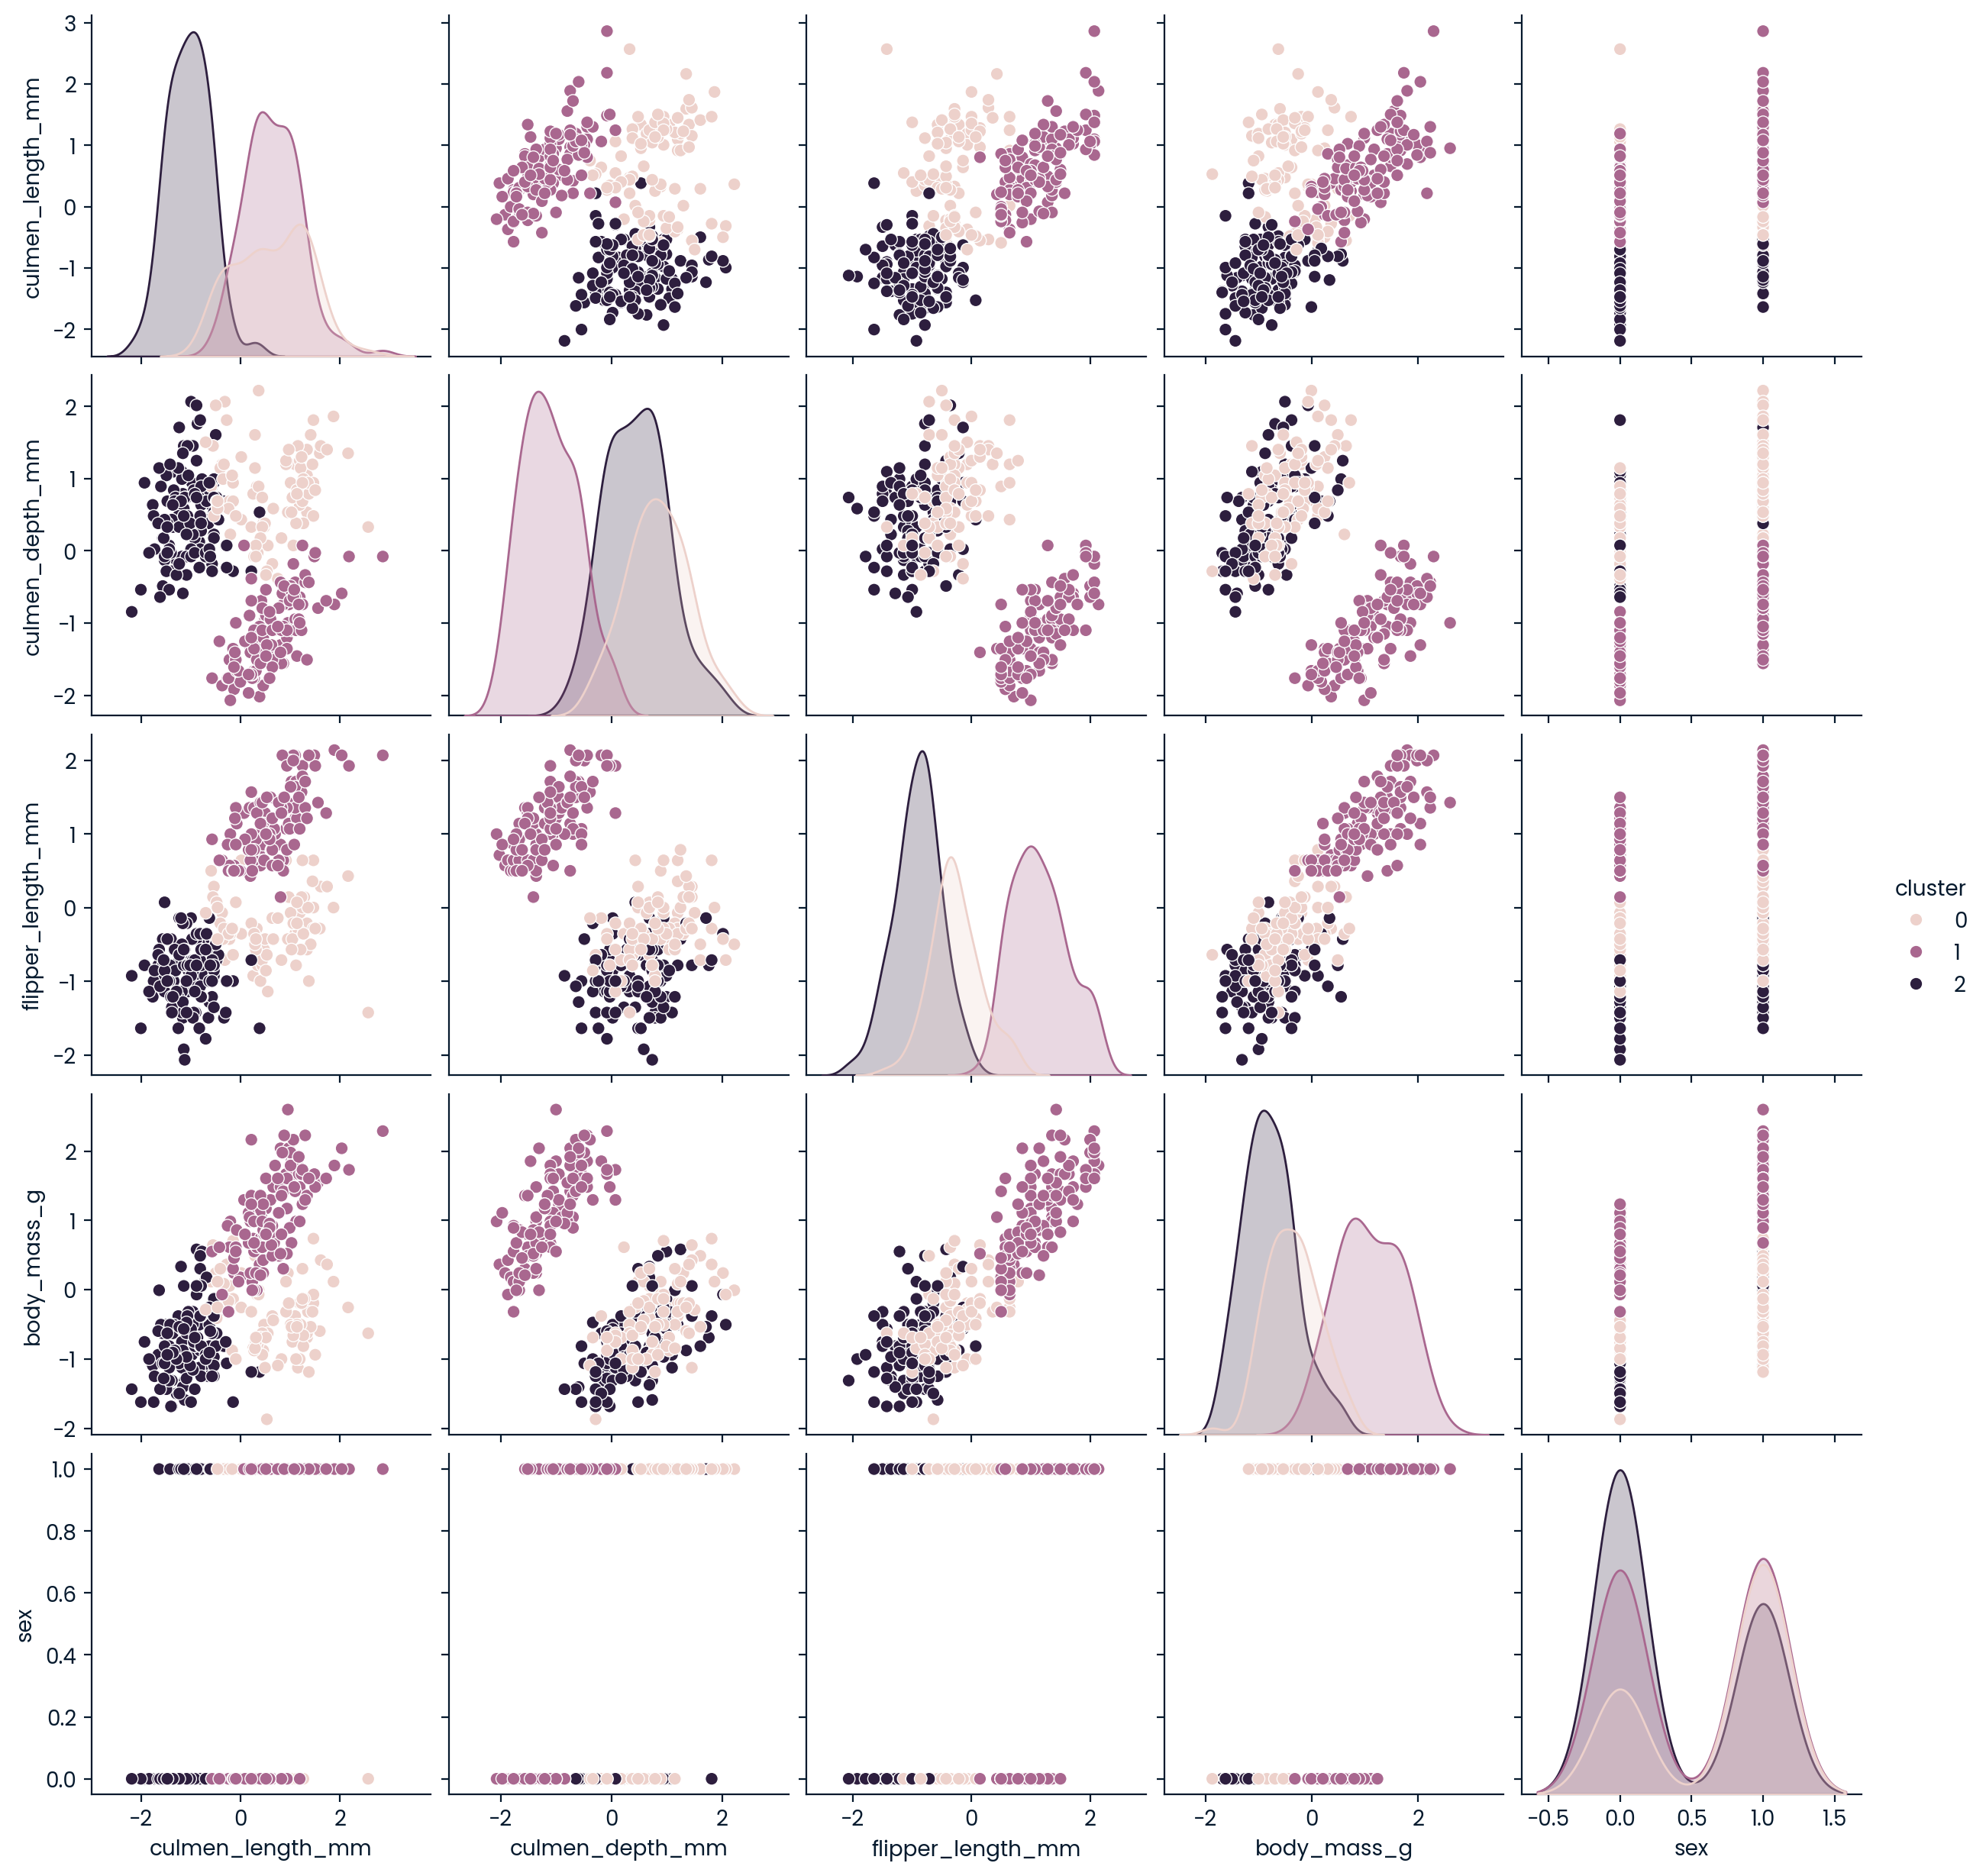

In [55]:
sns.pairplot(df, hue="cluster")

We can now discern those three groups much more easily for each of the plots.

## Generating Result

Finally, we can obtain the means of each attribute for each penguin species. We save those means into a dataframe called "stats_penguins".

In [56]:
penguins_df["cluster"] = df["cluster"]

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,2
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,2


In [57]:
means_0 = penguins_df[penguins_df["cluster"] == 0].mean()
means_1 = penguins_df[penguins_df["cluster"] == 1].mean()
means_2 = penguins_df[penguins_df["cluster"] == 2].mean()

stat_penguins = pd.DataFrame({
    "culmen_length_mm": [
        means_0.iloc[0],
        means_1.iloc[0],
        means_2.iloc[0]
    ],
    "culmen_depth_mm": [
        means_0.iloc[1],
        means_1.iloc[1],
        means_2.iloc[1]
    ],
    "flipper_length_mm": [
        means_0.iloc[2],
        means_1.iloc[2],
        means_2.iloc[2]
    ],
    "body_mass_g": [
        means_0.iloc[3],
        means_1.iloc[3],
        means_2.iloc[3]
    ]
})

stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,47.477907,18.787209,197.279070,3918.604651
1,47.568067,14.996639,217.235294,5092.436975
2,38.356693,18.066929,188.244094,3571.259843
